In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from sklearn.cluster import KMeans

In [2]:
# Read the Excel file into a DataFrame
file_path = './data/Amazon_2_Raw.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='Amazon')

# Display the DataFrame
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product_ID,Product Name,Product_ID.1,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff,United States,Los Angeles,California,Labels,AMZ_P_001,Self-Adhesive Address Labels for Typewriters b...,AMZ_P_001,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman,United States,Los Angeles,California,Furnishings,AMZ_P_002,Eldon Expressions Wood and Plastic Desk Access...,AMZ_P_002,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman,United States,Los Angeles,California,Art,AMZ_P_003,Newell 322,AMZ_P_003,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman,United States,Los Angeles,California,Phones,AMZ_P_004,Mitel 5320 IP Phone VoIP phone,AMZ_P_004,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman,United States,Los Angeles,California,Binders,AMZ_P_005,DXL Angle-View Binders with Locking Rings by S...,AMZ_P_005,18.504,3,5.7825


In [3]:
print(df)

            Order ID Order Date  Ship Date   Customer Name        Country  \
0     CA-2013-138688 2013-06-13 2013-06-17   DarrinVanHuff  United States   
1     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman  United States   
2     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman  United States   
3     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman  United States   
4     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman  United States   
...              ...        ...        ...             ...            ...   
3198  CA-2013-125794 2013-09-30 2013-10-04     MarisLaWare  United States   
3199  CA-2014-121258 2014-02-27 2014-03-04      DaveBrooks  United States   
3200  CA-2014-121258 2014-02-27 2014-03-04      DaveBrooks  United States   
3201  CA-2014-121258 2014-02-27 2014-03-04      DaveBrooks  United States   
3202  CA-2014-119914 2014-05-05 2014-05-10     ChrisCortes  United States   

             City       State     Category  Product_ID  \
0     Los Angeles

In [4]:
summary_stats = df.describe()
print(summary_stats)

              Sales     Quantity       Profit
count   3203.000000  3203.000000  3203.000000
mean     226.493233     3.828910    33.849032
std      524.876877     2.260947   174.109081
min        0.990000     1.000000 -3399.980000
25%       19.440000     2.000000     3.852000
50%       60.840000     3.000000    11.166400
75%      215.809000     5.000000    33.000400
max    13999.960000    14.000000  6719.980800


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product_ID       0
Product Name     0
Product_ID.1     0
Sales            0
Quantity         0
Profit           0
dtype: int64


In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [7]:
# Check datatype of each column
data_types = df.dtypes
print(data_types)

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Customer Name            object
Country                  object
City                     object
State                    object
Category                 object
Product_ID               object
Product Name             object
Product_ID.1             object
Sales                   float64
Quantity                  int64
Profit                  float64
dtype: object


In [8]:
# numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# for column in numeric_columns:
#     plt.figure(figsize=(8, 4))
#     # Plot histogram
#     plt.hist(df[column], bins=25, edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
    
#     # Set x-axis limits based on column
#     if column == 'Sales':
#         plt.xlim(0, 3000)
#     elif column == 'Profit':
#         plt.xlim(-1000, 1000)
    
#     plt.show()


In [9]:
gtech_palette  = ['#B3A369', '#A28D5B', '#003057', '#54585A', '#D6DBD4', '#F9F6E5', '#EAAA00']

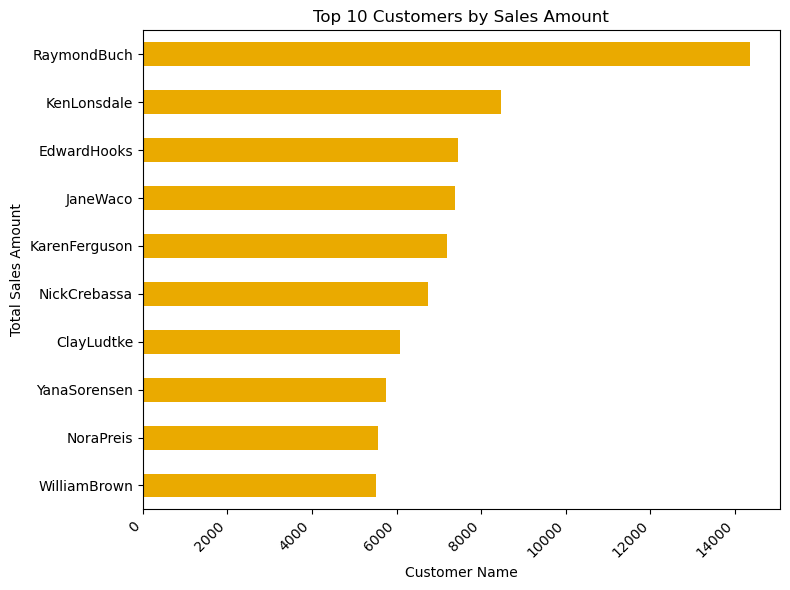

In [10]:
# Top 20 Email IDs by Sales Amount
top_email_ids_by_sales = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
top_email_ids_by_sales.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color='#EAAA00')  # Increased width
plt.title('Top 10 Customers by Sales Amount')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')  # Adjusted rotation angle
plt.tight_layout()  # Ensures all elements are properly visible
plt.show()

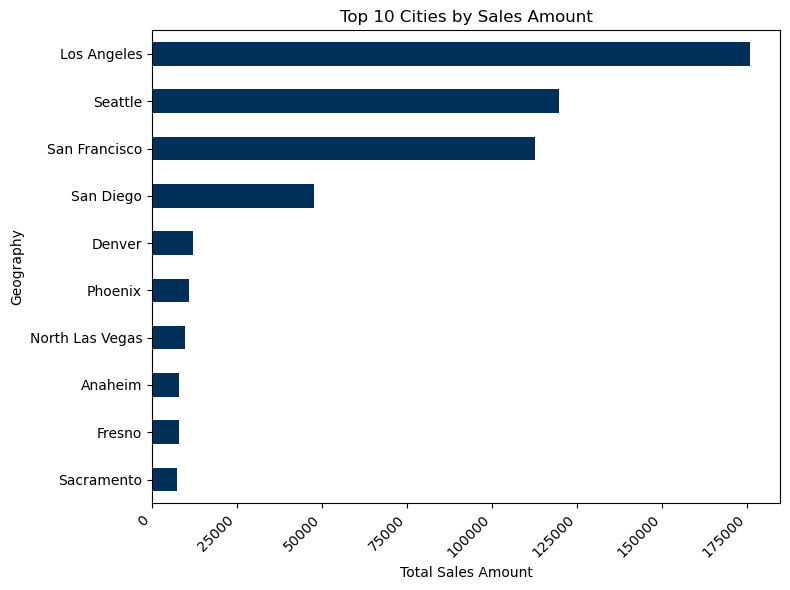

In [11]:
# Top 10 Geography by Sales Amount
top_geography_by_sales = df.groupby('City')['Sales'].sum().nlargest(10)
top_geography_by_sales.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color='#003057')  # Increased width
plt.title('Top 10 Cities by Sales Amount')
plt.ylabel('Geography')
plt.xlabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')  # Adjusted rotation angle
plt.tight_layout()  # Ensures all elements are properly visible
plt.show()

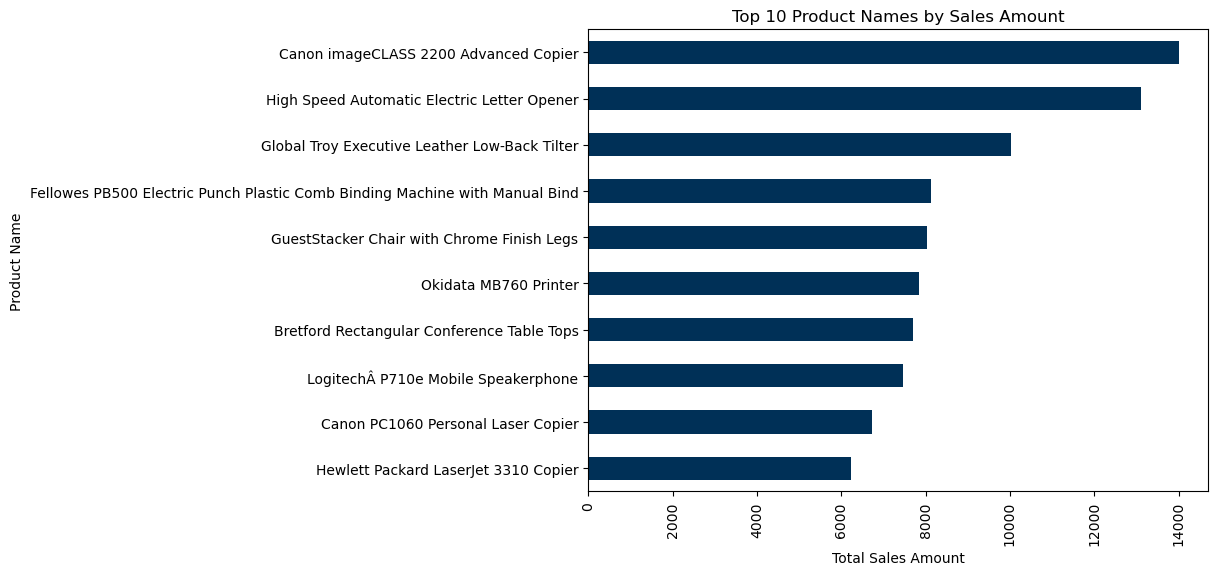

In [12]:
# Top 20 Product Names by Sales Amount
top_product_names_by_sales = df.groupby('Product Name')['Sales'].sum().nlargest(10)
top_product_names_by_sales.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color='#003057') 
plt.title('Top 10 Product Names by Sales Amount')
plt.ylabel('Product Name')
plt.xlabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()

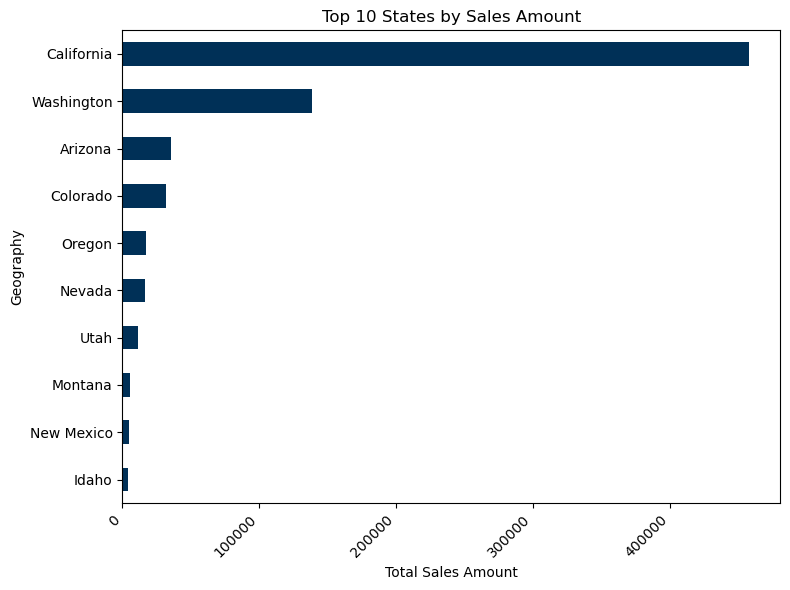

In [13]:
# Top 20 Geography by Sales Amount
top_geography_by_sales = df.groupby('State')['Sales'].sum().nlargest(10)
top_geography_by_sales.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color='#003057')   # Increased width
plt.title('Top 10 States by Sales Amount')
plt.ylabel('Geography')
plt.xlabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')  # Adjusted rotation angle
plt.tight_layout()  # Ensures all elements are properly visible
plt.show()


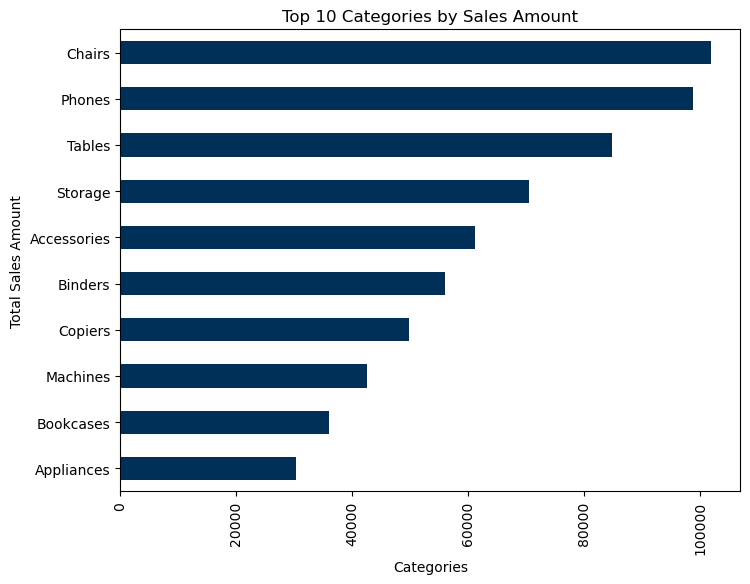

In [14]:

# Top 20 Product Names by Sales Amount
top_product_names_by_sales = df.groupby('Category')['Sales'].sum().nlargest(10)
top_product_names_by_sales.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color='#003057')
plt.title('Top 10 Categories by Sales Amount')
plt.xlabel('Categories')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()

In [15]:
# # Filter columns with numerical data types
# numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# # Create box plots for each numerical column
# for column in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x=df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.xlabel(column)
#     plt.show()


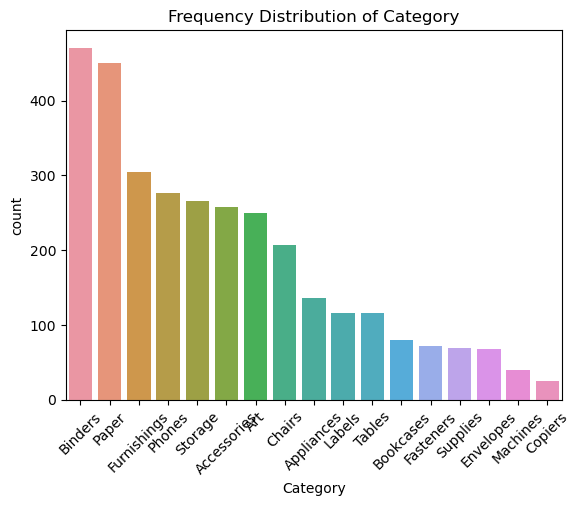

In [16]:
# Determine the order of categories based on frequency
category_order = df['Category'].value_counts().index

# Visualize frequency distribution of categorical feature with sorted bars
sns.countplot(data=df, x='Category', order=category_order)
plt.title('Frequency Distribution of Category')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Calculate total profit for each category
category_profit = df.groupby('Category')['Profit'].sum()

# Sort categories by profit in descending order
sorted_categories = category_profit.sort_values(ascending=False)

# Print the most profitable categories
print("Most profitable categories:")
print(sorted_categories.head())

# Print the least profitable categories
print("\nLeast profitable categories:")
print(sorted_categories.tail())


Most profitable categories:
Category
Copiers        19327.2351
Accessories    16484.5983
Binders        16096.8016
Paper          12119.2364
Phones          9110.7426
Name: Profit, dtype: float64

Least profitable categories:
Category
Tables       1482.6073
Supplies      626.0465
Fasteners     275.1907
Machines     -618.9264
Bookcases   -1646.5117
Name: Profit, dtype: float64


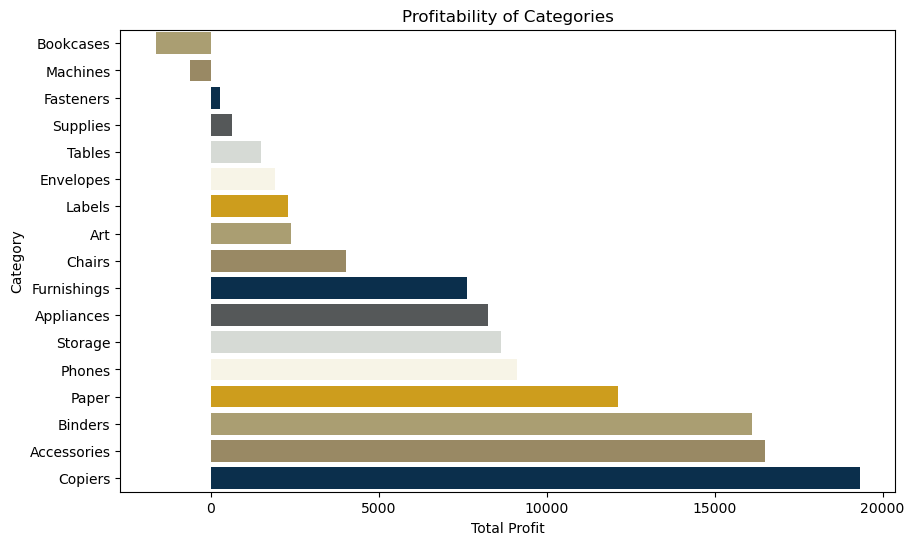

In [18]:

# Calculate total profit for each category
category_profit = df.groupby('Category')['Profit'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.values, y=category_profit.index, palette=['#B3A369', '#A28D5B', '#003057', '#54585A', '#D6DBD4', '#F9F6E5', '#EAAA00'])
plt.title('Profitability of Categories')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.show()

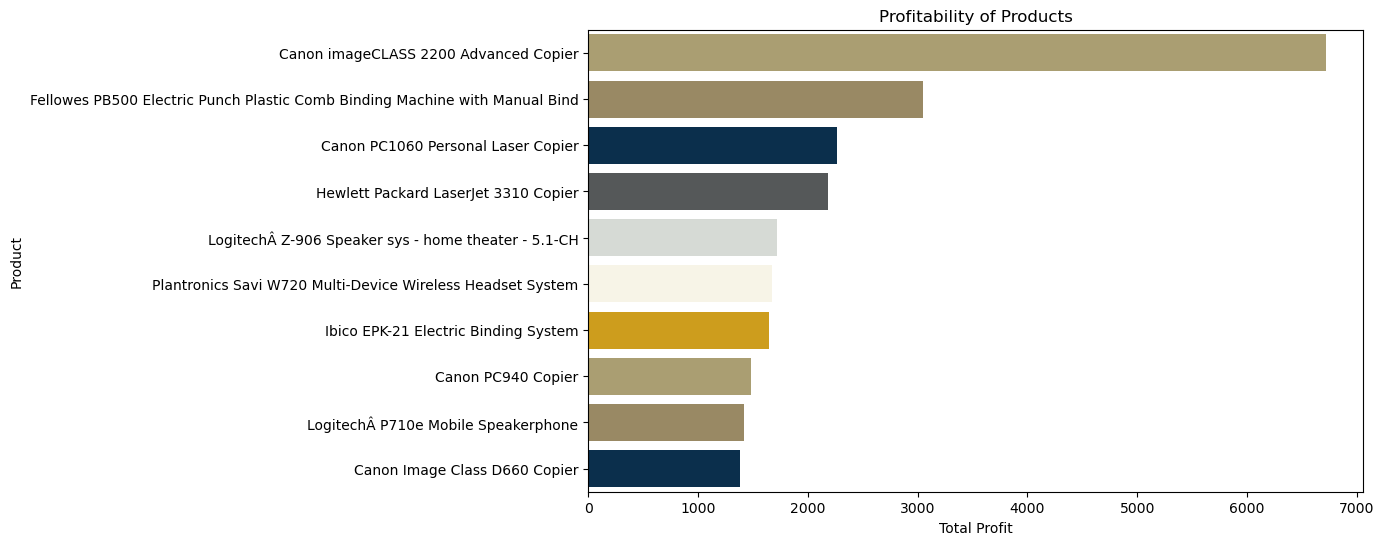

In [19]:
# Calculate total profit for each category
category_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.values, y=category_profit.index, palette=['#B3A369', '#A28D5B', '#003057', '#54585A', '#D6DBD4', '#F9F6E5', '#EAAA00'])
plt.title('Profitability of Products')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.show()

In [20]:
# # Calculate total profit for each geography
# geography_profit = df.groupby('Geography')['Profit'].sum().sort_values()

# # Plotting
# plt.figure(figsize=(12, 8))
# sns.barplot(x=geography_profit.values, y=geography_profit.index, palette='coolwarm')
# plt.title('Profitability by Geography')
# plt.xlabel('Total Profit')
# plt.ylabel('Geography')
# plt.show()


In [21]:
# # Calculate total profit for each city
# city_profit = df.groupby('City')['Profit'].sum().sort_values()

# # Plotting
# plt.figure(figsize=(12, 8))
# sns.barplot(x=city_profit.values, y=city_profit.index, palette='coolwarm')
# plt.title('Profitability by City')
# plt.xlabel('Total Profit')
# plt.ylabel('City')
# plt.show()


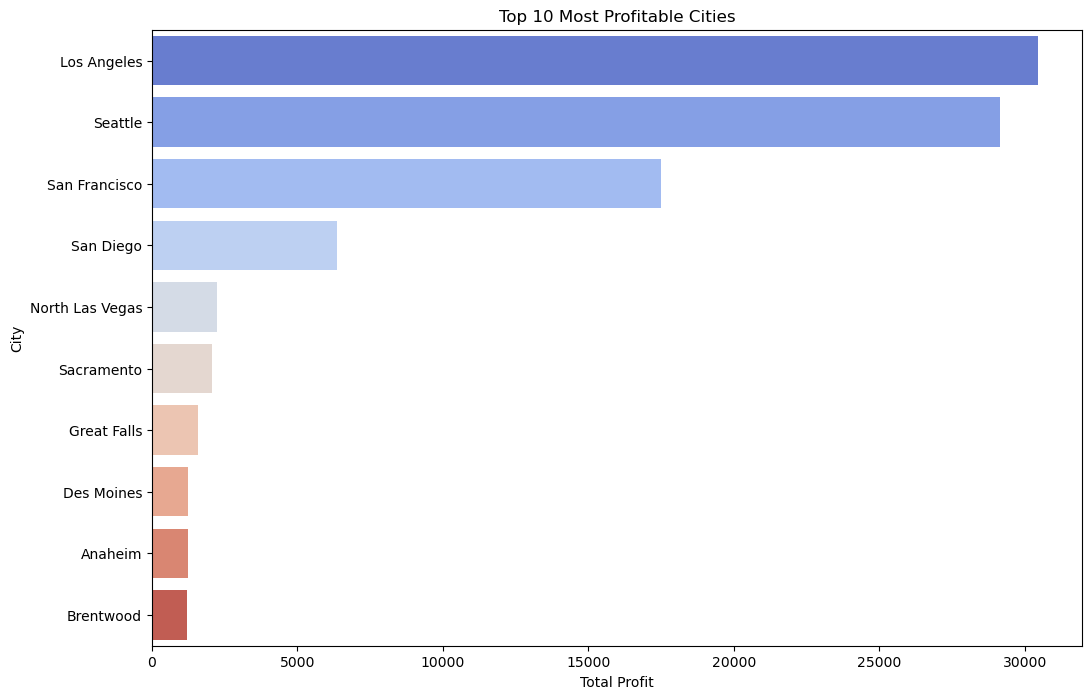

In [22]:
# Select top 10 most profitable cities
city_profit = df.groupby('City')['Profit'].sum().sort_values()
top_10_cities = city_profit.nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='coolwarm')
plt.title('Top 10 Most Profitable Cities')
plt.xlabel('Total Profit')
plt.ylabel('City')
plt.show()


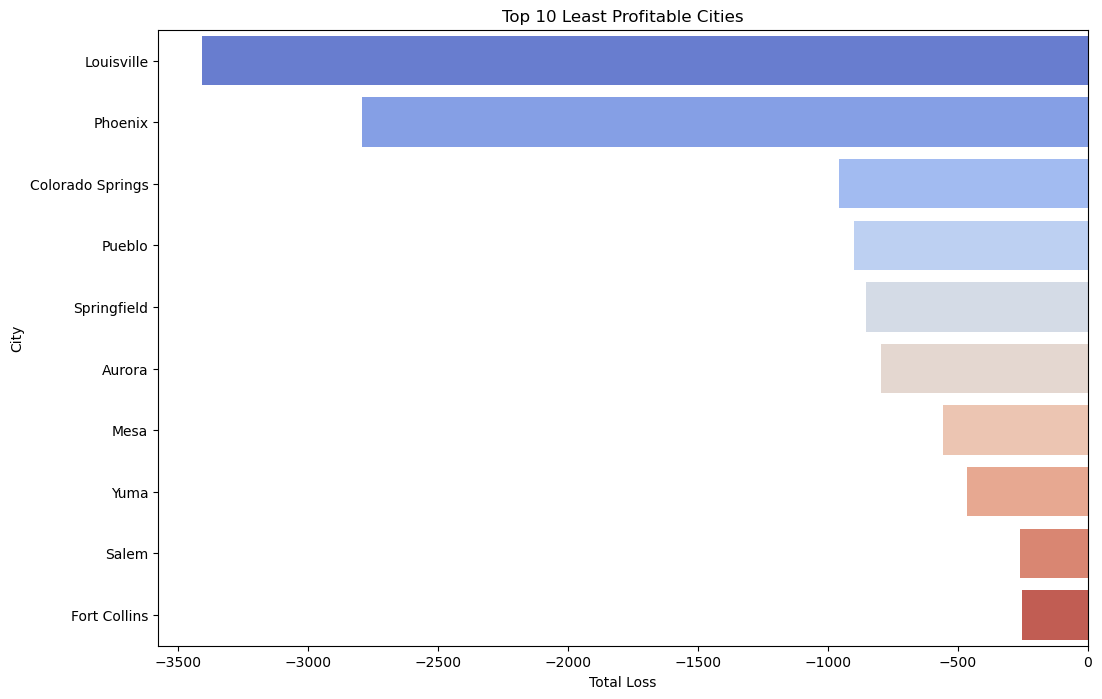

In [23]:
# Select bottom 10 least profitable cities
bottom_10_cities = city_profit.nsmallest(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=bottom_10_cities.values, y=bottom_10_cities.index, palette='coolwarm')
plt.title('Top 10 Least Profitable Cities')
plt.xlabel('Total Loss')
plt.ylabel('City')
plt.show()


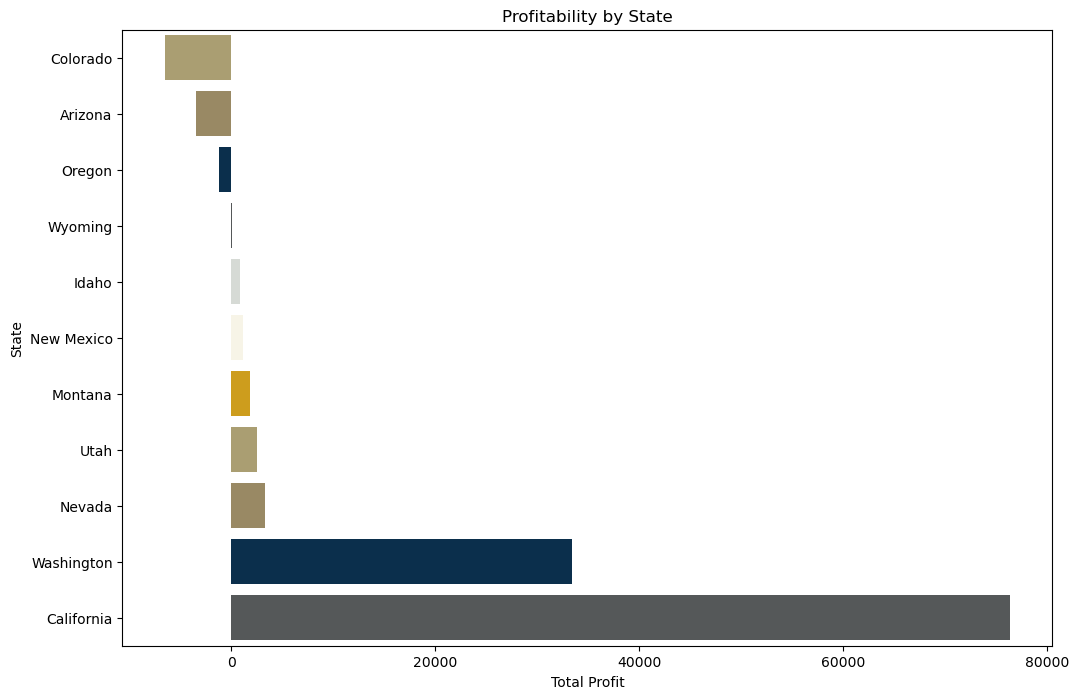

In [24]:
# Calculate total profit for each state
state_profit = df.groupby('State')['Profit'].sum().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=state_profit.values, y=state_profit.index, palette=['#B3A369', '#A28D5B', '#003057', '#54585A', '#D6DBD4', '#F9F6E5', '#EAAA00'])
plt.title('Profitability by State')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()

0     5.182641
1     4.964096
2    14.049329
3     9.615985
4    25.975648
5    21.511083
6    11.270684
7     7.430534
Name: Delivery_Time, dtype: float64


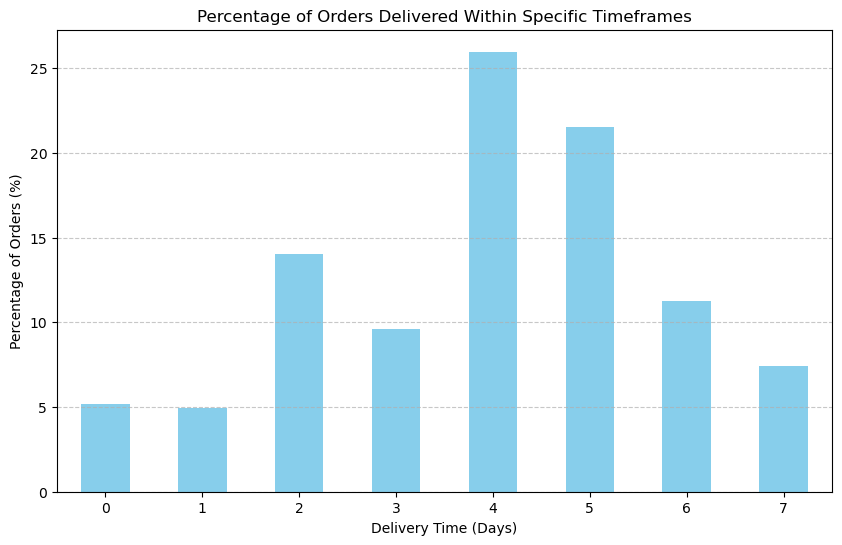

In [25]:
# Calculate the time taken for delivery (in days)
df['Delivery_Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate the percentage of orders delivered within certain timeframes
delivery_percentage = (df['Delivery_Time'].value_counts(normalize=True) * 100).sort_index()

# Print the delivery percentage
print(delivery_percentage)


# Plotting
plt.figure(figsize=(10, 6))
delivery_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Orders Delivered Within Specific Timeframes')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Percentage of Orders (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


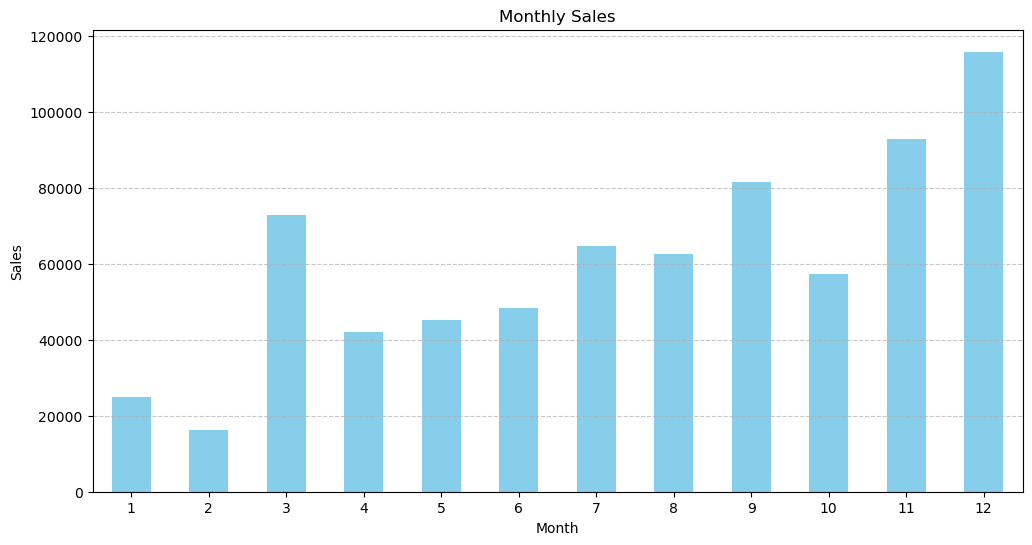

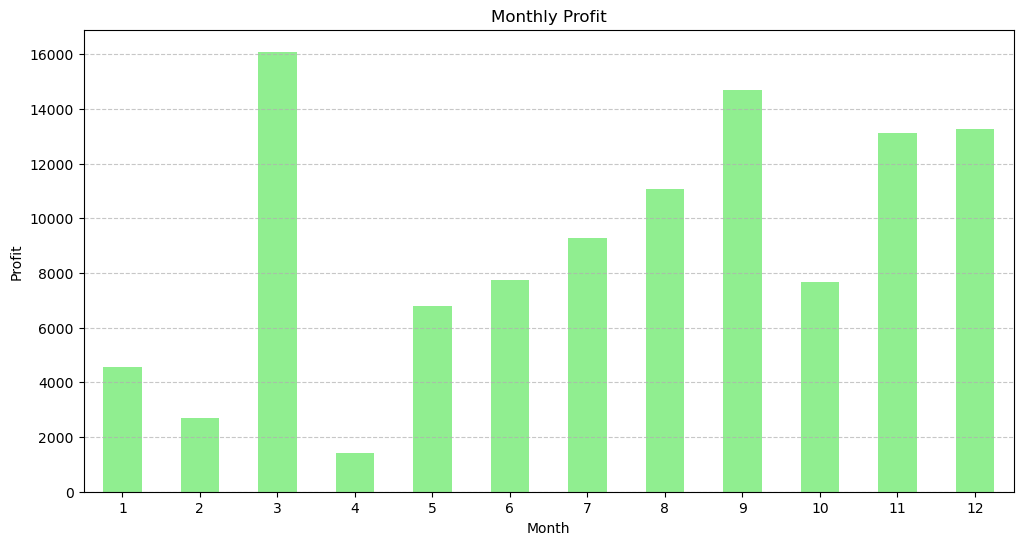

In [26]:
# Extract month from the 'Order Date' column
df['Month'] = df['Order Date'].dt.month

# Calculate monthly sales and profit
monthly_sales_profit = df.groupby('Month').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales_profit['Sales'].plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot monthly profit
plt.figure(figsize=(12, 6))
monthly_sales_profit['Profit'].plot(kind='bar', color='lightgreen')
plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


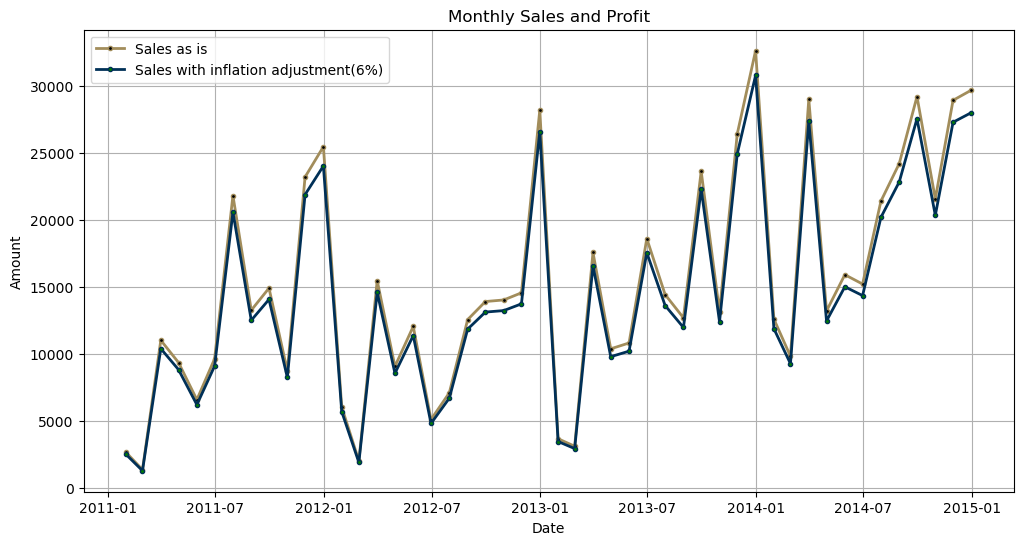

In [37]:
# Step 1: Create a temporary DataFrame
temp_df = df.copy()

# Convert the 'Order Date' column to the last day of the month
temp_df['Order Date'] = pd.to_datetime(temp_df['Order Date']).dt.to_period('M').dt.to_timestamp('M')
# Group by 'Order Date' and sum 'Sales' and 'Profit'
monthly_sales_profit = temp_df.groupby('Order Date')[['Sales', 'Profit']].sum()



# Convert index and columns to numpy arrays
dates = monthly_sales_profit.index.to_numpy()
sales = monthly_sales_profit['Sales'].to_numpy()
profit = monthly_sales_profit['Profit'].to_numpy()
sales_inflation_adjusted = (monthly_sales_profit['Sales']/1.06).to_numpy()


# Plot monthly sales and profit
plt.figure(figsize=(12, 6))
plt.plot(dates, sales, label='Sales as is', color='#A28D5B', marker='o', linestyle='-', linewidth=2, markersize=3, markerfacecolor='black')
plt.plot(dates, sales_inflation_adjusted, label='Sales with inflation adjustment(6%)', color='#003057', marker='o', linestyle='-', linewidth=2, markersize=3, markerfacecolor='green')
plt.title('Monthly Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
monthly_sales_profit.reset_index()

,Order Date,Sales,Profit
0,2011-01-31,2648.0570,20.9733
1,2011-02-28,1348.6220,228.8282
2,2011-03-31,11008.8980,1534.2273
3,2011-04-30,9343.4870,1629.4545
4,2011-05-31,6570.4380,873.5640
5,2011-06-30,9629.4220,1771.8152
6,2011-07-31,21808.5530,1946.6828
7,2011-08-31,13248.2310,2560.9044
8,2011-09-30,14900.5370,3075.5227
9,2011-10-31,8728.7580,1391.2655


In [28]:
# Define the SARIMA model
model_sales = SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_profit = SARIMAX(df['Profit'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
result_sales = model_sales.fit()
result_profit = model_profit.fit()

# Forecast sales and profit for the next 24 months (2 years)
forecast_sales = result_sales.forecast(steps=24)
forecast_profit = result_profit.forecast(steps=24)

# Print the forecasted sales and profit
print("Forecasted Sales for the next 2 years:")
print(forecast_sales)

print("\nForecasted Profit for the next 2 years:")
print(forecast_profit)


Forecasted Sales for the next 2 years:
3203    300.863914
3204    215.887111
3205    234.042154
3206    222.044722
3207    226.635004
3208    196.981505
3209    228.722214
3210    214.619969
3211    258.595717
3212    244.361967
3213    226.523648
3214    215.384278
3215    300.926776
3216    215.809194
3217    233.950121
3218    222.102478
3219    226.547743
3220    196.911846
3221    228.889322
3222    214.553463
3223    258.536298
3224    244.411682
3225    226.445952
3226    215.442177
Name: predicted_mean, dtype: float64

Forecasted Profit for the next 2 years:
3203    67.073695
3204    36.683498
3205    46.402363
3206    46.984977
3207    37.193327
3208    34.312959
3209    41.537965
3210    31.798110
3211    39.035706
3212    39.597707
3213    28.508686
3214    42.110326
3215    66.341876
3216    36.468633
3217    46.123495
3218    46.906600
3219    36.937713
3220    34.119956
3221    42.514125
3222    31.713190
3223    38.894276
3224    39.482756
3225    28.435263
3226    42.41

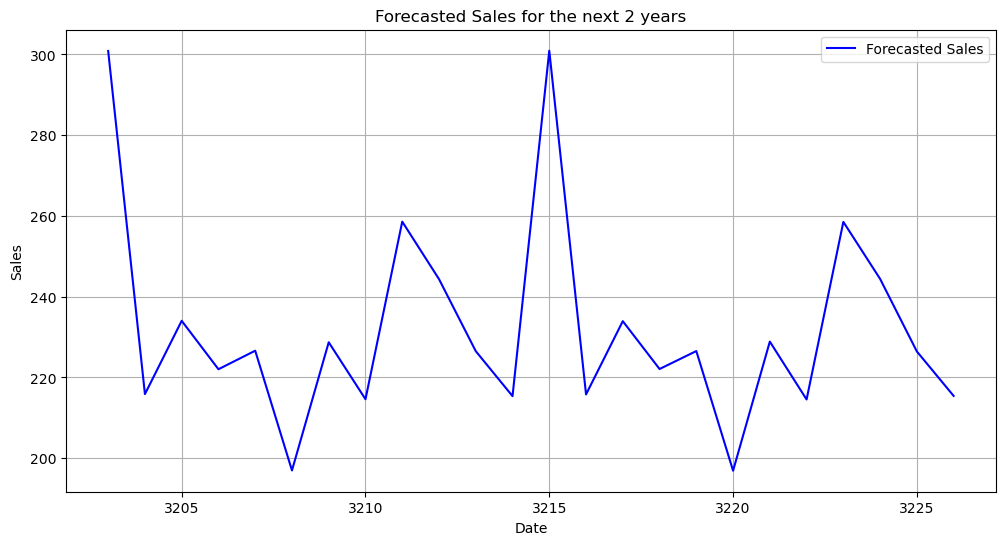

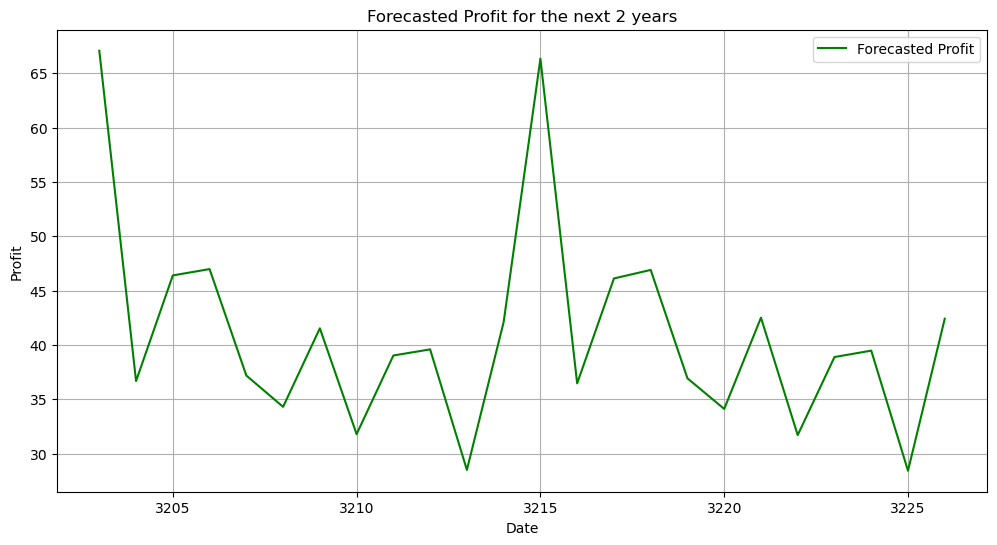

In [29]:
# Convert index to NumPy array
sales_index = np.array(forecast_sales.index)
profit_index = np.array(forecast_profit.index)

# Plot forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_index, forecast_sales.values, label='Forecasted Sales', color='blue')
plt.title('Forecasted Sales for the next 2 years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Plot forecasted profit
plt.figure(figsize=(12, 6))
plt.plot(profit_index, forecast_profit.values, label='Forecasted Profit', color='green')
plt.title('Forecasted Profit for the next 2 years')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

###########################################
IGNORE BELOW THIS
########################################

In [30]:
# # Convert 'Order Date' column to datetime format
# df['Order Date'] = pd.to_datetime(df['Order Date'])

# # Convert 'Sales' and 'Profit' columns to NumPy arrays
# sales_array = df['Sales'].values
# profit_array = df['Profit'].values

# # Plot the time series data
# plt.figure(figsize=(12, 6))
# plt.plot(df['Order Date'], sales_array, label='Sales', color='blue')
# plt.plot(df['Order Date'], profit_array, label='Profit', color='green')
# plt.title('Time Series Plot of Sales and Profit')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()
# plt.show()

In [31]:
# # from statsmodels.tsa.seasonal import STL

# # # Trend Analysis
# # stl = STL(df['Sales'], seasonal=12)  # Assuming yearly seasonality
# # trend = stl.trend
# # seasonal = stl.seasonal
# # residual = stl.resid

# # plt.figure(figsize=(12, 6))
# # plt.plot(df['Sales'], label='Original', color='blue')
# # plt.plot(trend, label='Trend', color='red')
# # plt.plot(seasonal, label='Seasonal', color='green')
# # plt.plot(residual, label='Residual', color='orange')
# # plt.title('Trend Decomposition of Sales')
# # plt.xlabel('Date')
# # plt.ylabel('Amount')
# # plt.legend()
# # plt.show()


# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Fit SARIMA model to the 'Sales' data for trend
# sarima_trend = SARIMAX(df['Sales'], order=(1, 1, 1), trend='t')
# sarima_result_trend = sarima_trend.fit()

# # Fit SARIMA model to the 'Sales' data for seasonal component
# sarima_seasonal = SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# sarima_result_seasonal = sarima_seasonal.fit()

# # Get the fitted trend and seasonal components
# trend_sarima = sarima_result_trend.fittedvalues
# seasonal_sarima = sarima_result_seasonal.fittedvalues

# # Calculate residual component
# residual_sarima = df['Sales'] - trend_sarima - seasonal_sarima

# # Plot the components
# plt.figure(figsize=(12, 6))
# plt.plot(df['Sales'], label='Original', color='blue')
# plt.plot(trend_sarima, label='Trend', color='red')
# plt.plot(seasonal_sarima, label='Seasonal', color='green')
# plt.plot(residual_sarima, label='Residual', color='orange')
# plt.title('Trend Decomposition of Sales (SARIMA)')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()
# plt.show()





In [32]:
# plt.figure(figsize=(12, 10))

# # Plot original data
# plt.subplot(4, 1, 1)
# plt.plot(df['Sales'], label='Original', color='blue')
# plt.title('Original Data')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# # Plot trend component
# plt.subplot(4, 1, 2)
# plt.plot(trend_sarima, label='Trend', color='red')
# plt.title('Trend Component')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# # Plot seasonal component
# plt.subplot(4, 1, 3)
# plt.plot(seasonal_sarima, label='Seasonal', color='green')
# plt.title('Seasonal Component')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# # Plot residual component
# plt.subplot(4, 1, 4)
# plt.plot(residual_sarima, label='Residual', color='orange')
# plt.title('Residual Component')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [33]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Perform Classical Decomposition
# decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)  # Assuming a seasonal period of 12 months

# # Extract components
# trend_classical = decomposition.trend
# seasonal_classical = decomposition.seasonal
# residual_classical = decomposition.resid

# # Plot the components
# plt.figure(figsize=(12, 10))

# # Plot original data
# plt.subplot(4, 1, 1)
# plt.plot(df['Sales'], label='Original', color='blue')
# plt.title('Original Data')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# # Plot trend component
# plt.subplot(4, 1, 2)
# plt.plot(trend_classical, label='Trend', color='red')
# plt.title('Trend Component')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# # Plot seasonal component
# plt.subplot(4, 1, 3)
# plt.plot(seasonal_classical, label='Seasonal', color='green')
# plt.title('Seasonal Component')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# # Plot residual component
# plt.subplot(4, 1, 4)
# plt.plot(residual_classical, label='Residual', color='orange')
# plt.title('Residual Component')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()

# plt.tight_layout()
# plt.show()




In [34]:
# # Seasonality Analysis (Autocorrelation Plot)
# plt.figure(figsize=(12, 6))
# plot_acf(df['Sales'], lags=24, alpha=0.05)
# plt.title('Autocorrelation Plot for Sales')
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.show()

# # Correlation Analysis
# correlation_matrix = df[['Sales', 'Profit']].corr()

# # Anomaly Detection (Residual Analysis)
# residual_anomalies = residual > 2 * np.std(residual)

# # Rolling Statistics
# rolling_mean = df['Sales'].rolling(window=12).mean()
# rolling_std = df['Sales'].rolling(window=12).std()

# # Resampling and Aggregation (Monthly)
# monthly_sales_profit = df.resample('M').sum()

# # Forecast Evaluation (MAE, MSE, RMSE)
# mae = mean_absolute_error(test_sales, forecast_sales)
# mse = mean_squared_error(test_sales, forecast_sales)
# rmse = np.sqrt(mse)

# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)

In [35]:
#pip install geopandas